In [2]:
#Load and Inspect THe dataset
#In This Task we are using Cleaned Dataset
#Import Necessary Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("Dataset.csv")
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female            0.0     Yes         No     1.0           No   
1  5575-GNVDE    Male            0.0      No         No    34.0          Yes   
2  3668-QPYBK    Male            0.0      No         No     2.0          NaN   
3  7795-CFOCW    Male            0.0      No         No    45.0           No   
4  9237-HQITU  Female            0.0      No         No     2.0          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [3]:
#Convert the value in 1/0 form
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [5]:
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female            0.0     Yes         No     1.0           No   
1  5575-GNVDE    Male            0.0      No         No    34.0          Yes   
2  3668-QPYBK    Male            0.0      No         No     2.0          NaN   
3  7795-CFOCW    Male            0.0      No         No    45.0           No   
4  9237-HQITU  Female            0.0      No         No     2.0          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [10]:
df_cleaned = df.copy()
df_cleaned.dropna(subset=["Churn", "tenure", "Contract", "PaymentMethod"], inplace=True)

In [11]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,NaN,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0.0,No,No,2.0,NaN,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,9848-JQJTX,Male,0.0,No,No,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),100.90,7459.05,0
95,8637-XJIVR,Female,0.0,No,No,12.0,Yes,Yes,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,78.95,927.35,1
96,9803-FTJCG,Male,0.0,Yes,Yes,71.0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,One year,Yes,Credit card (automatic),66.85,4748.70,0
97,0278-YXOOG,Male,0.0,No,No,5.0,Yes,No,No,No internet service,...,NaN,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,21.05,113.85,1


In [12]:
#Overall Churn Rate
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print(churn_rate)

Churn
0    76.767677
1    23.232323
Name: proportion, dtype: float64


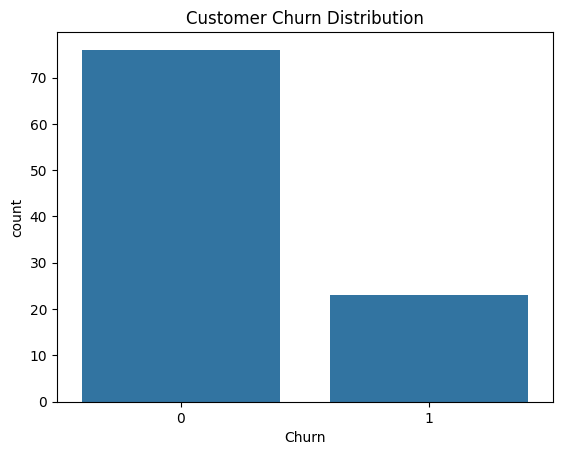

In [15]:
#Graph of overall churn Rate
sns.countplot(data=df, x='Churn')
plt.title("Customer Churn Distribution")
plt.show()

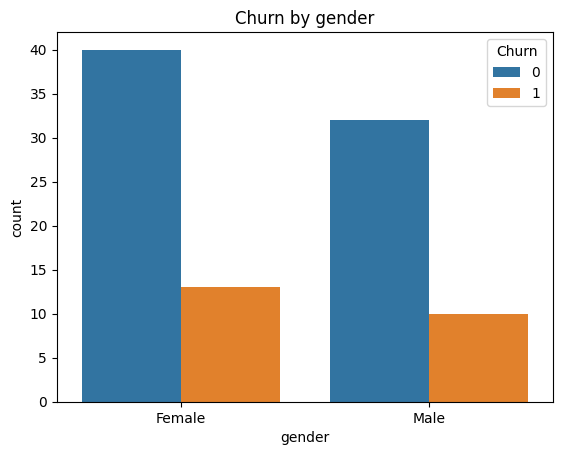

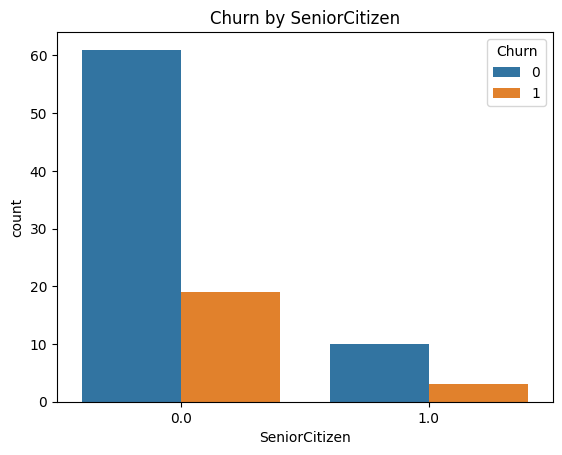

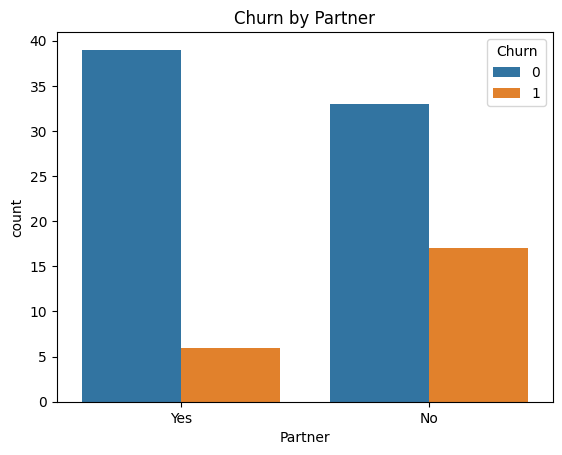

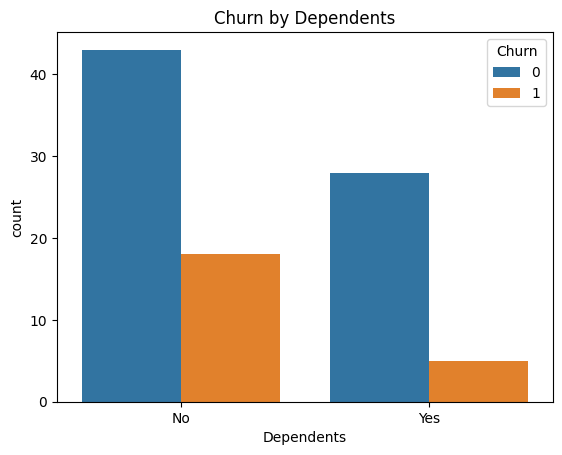

In [14]:
#Customer distribution by various demographic
demographics = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
for col in demographics:
    sns.countplot(data=df_cleaned, x=col, hue='Churn')
    plt.title(f'Churn by {col}')
    plt.show()

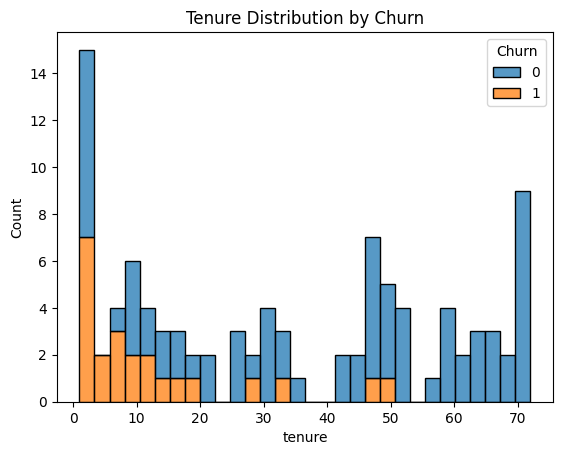

In [21]:
#Analyze tanure distribution
sns.histplot(data=df, x='tenure', bins=30, hue='Churn', multiple='stack')
plt.title("Tenure Distribution by Churn")
plt.show()

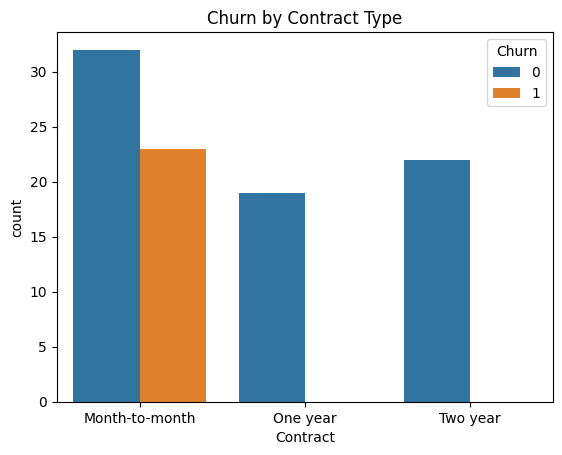

In [31]:
#Investigate relationships between churn and contract types
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title("Churn by Contract Type")
plt.show()

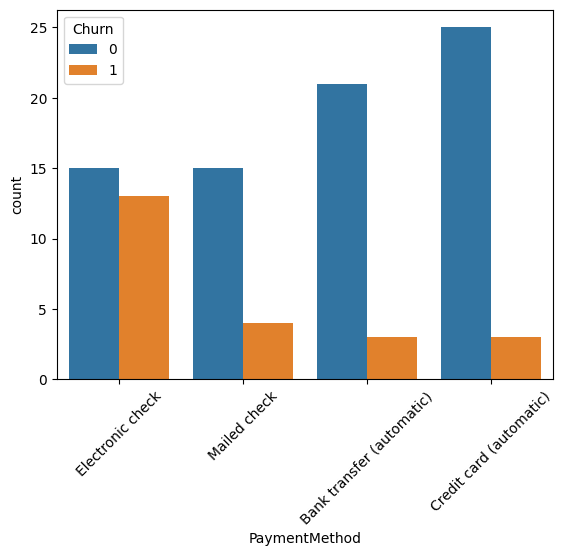

In [33]:
#Investigate relationships between churn and payment Method
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.xticks(rotation=45)
plt.show()

In [ ]:
Observations:
            Month-to-month contracts show highest churn.

            Customers paying via electronic check churn the most.